**Elastic Net Regression: Implementation and Comparitive Analysis with Lasso & Ridge**

Aishwarya Shenoy & Swapna Gadre

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import genfromtxt
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


**Reading the data**

In [ ]:
data_url = 'http://lib.stat.cmu.edu/datasets/boston'
data = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Empty list to store the combined rows
combined_data = []

for i in range(0, len(data), 2):
    if i + 1 < len(data):  # Check if there's another row to combine
        combined_row = np.concatenate((data.iloc[i], data.iloc[i + 1]))
        combined_data.append(combined_row)

    if len(combined_data)==506:
      break

# Converting the combined data list into a DataFrame
combined_df = pd.DataFrame(combined_data)

In [ ]:
combined_df=combined_df.iloc[:,:14]

In [ ]:
combined_df.shape

(506, 14)

In [ ]:
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
    'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]


#  CRIM     per capita crime rate by town
#  ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#  INDUS    proportion of non-retail business acres per town
#  CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#  NOX      nitric oxides concentration (parts per 10 million)
#  RM       average number of rooms per dwelling
#  AGE      proportion of owner-occupied units built prior to 1940
#  DIS      weighted distances to five Boston employment centres
#  RAD      index of accessibility to radial highways
#  TAX      full-value property-tax rate per $10,000
#  PTRATIO  pupil-teacher ratio by town
#  B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#  LSTAT    % lower status of the population
#  MEDV     Median value of owner-occupied homes in $1000's


In [ ]:
combined_df.columns=column_names

**Exploratory Data Analysis**



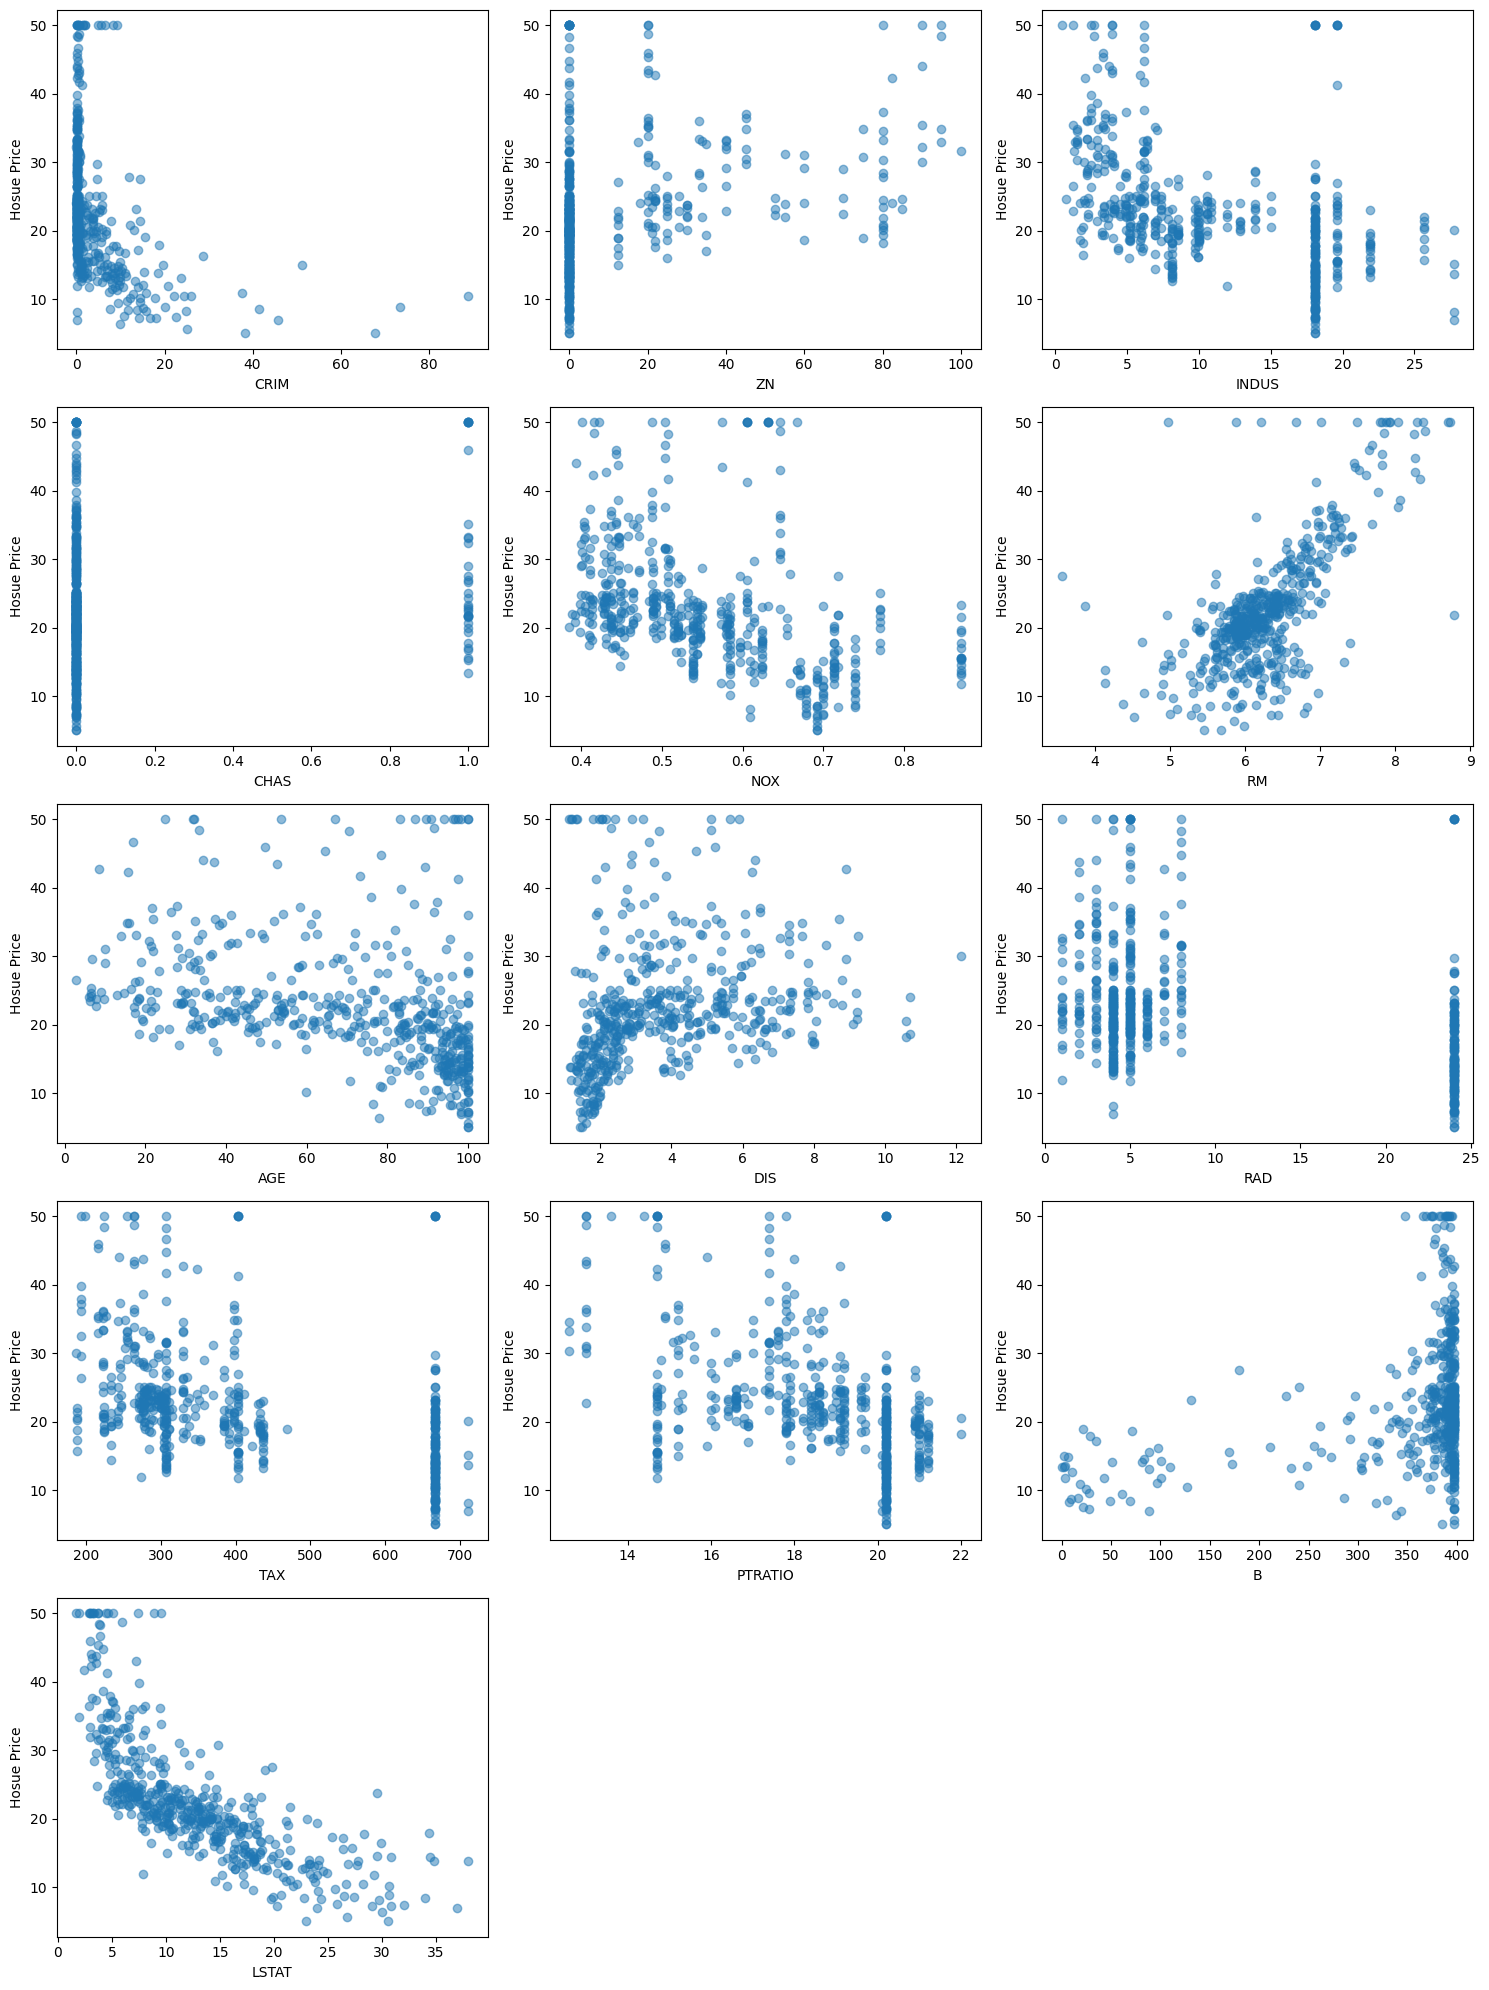

In [ ]:
feature_columns = column_names[:-1]

# Creating subplots for each feature vs target variable
num_features = len(feature_columns)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_features + num_cols - 1) // num_cols  # Number of rows in the subplot grid

plt.figure(figsize=(15, 20))

for i, feature in enumerate(feature_columns, start=1):
    plt.subplot(num_rows, num_cols, i)
    plt.scatter(combined_df[feature], combined_df['MEDV'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('House Price')

plt.tight_layout()
plt.show()

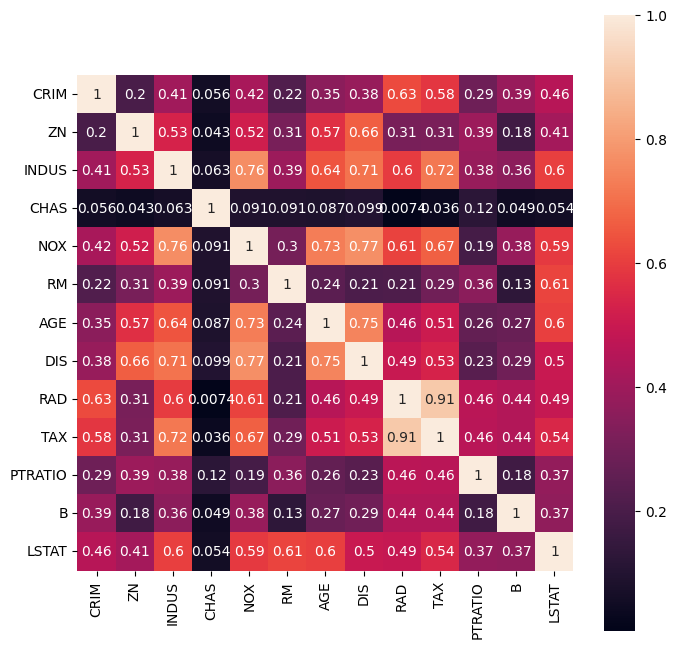

In [ ]:
#Creating heatmap for feature correlation

plt.figure(figsize=(8, 8))
ax = sns.heatmap(combined_df.iloc[:,:13].corr(method='pearson').abs(), annot=True, square=True)
plt.show()

**Training & Testing for various models**

In [ ]:
#Train Test split of 70:30

x_train, x_test, y_train, y_test = train_test_split(
    combined_df.iloc[:, :-1], combined_df.iloc[:, -1],
    test_size = 0.3)

print("Train data shape of X = % s and Y = % s : "%(
    x_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s : "%(
    x_test.shape, y_test.shape))

Train data shape of X = (354, 13) and Y = (354,) : 
Test data shape of X = (152, 13) and Y = (152,) : 


**Mutiple Linear Regression**

In [ ]:
lreg = LinearRegression()
lreg.fit(x_train, y_train)

# Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)

# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared Error on test set:", mean_squared_error)

# Putting together the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient)

Mean squared Error on test set: 19.893497598680778
    Columns  Coefficient Estimate
0      CRIM             -0.168110
1        ZN              0.059668
2     INDUS              0.031049
3      CHAS              3.452835
4       NOX            -20.172293
5        RM              3.932247
6       AGE              0.002053
7       DIS             -1.517075
8       RAD              0.351412
9       TAX             -0.012662
10  PTRATIO             -0.892344
11        B              0.011880
12    LSTAT             -0.480073


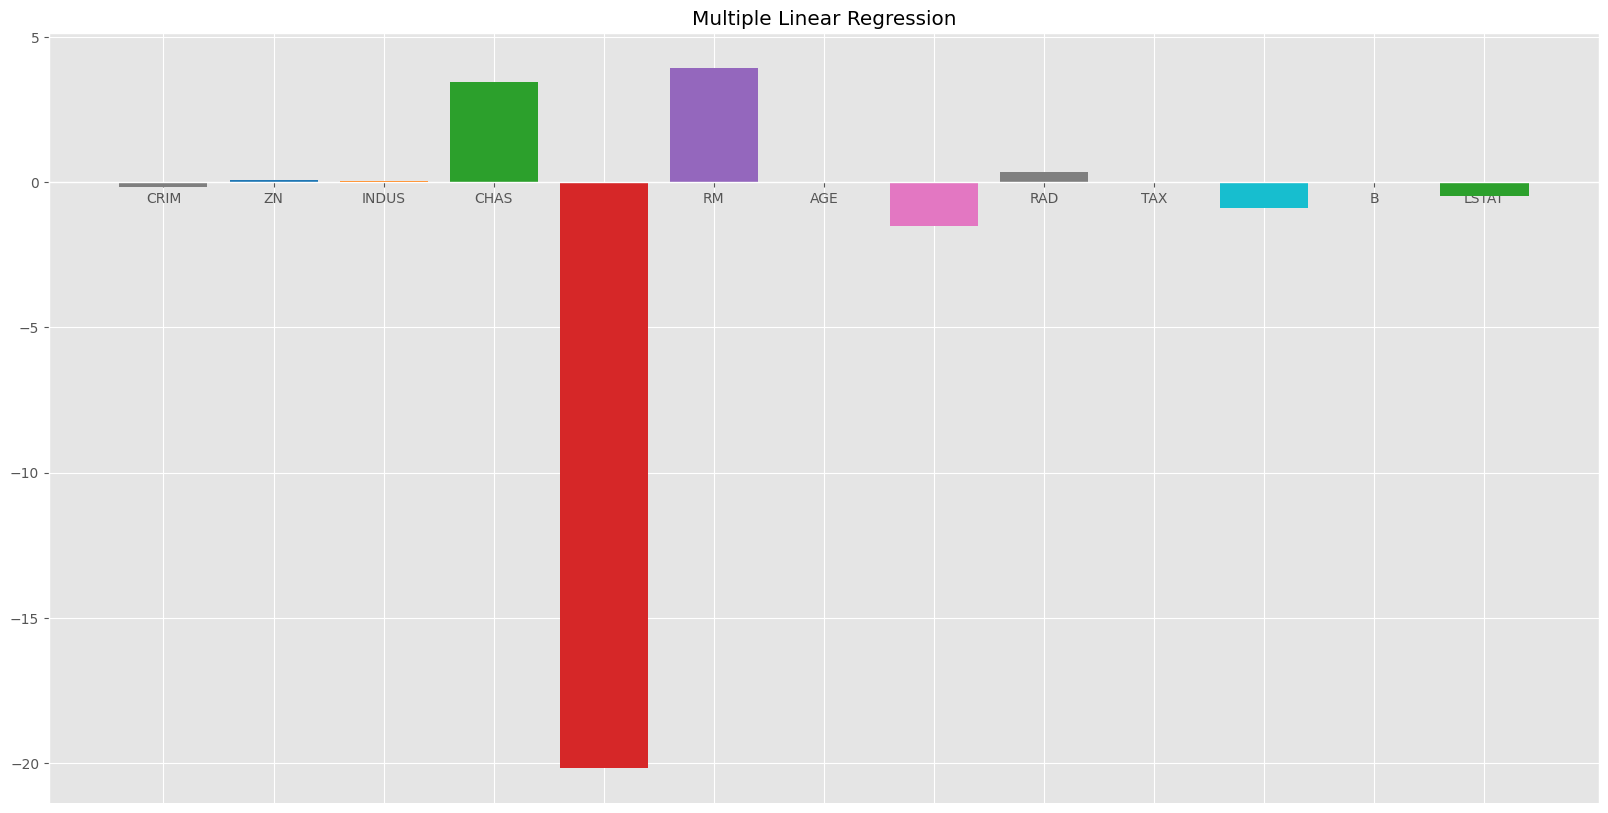

In [ ]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lreg_coefficient["Columns"],
lreg_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.title('Multiple Linear Regression')
plt.show()

**Ridge Regression**

In [ ]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 2)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print("Mean squared Error on test set:",mean_squared_error_ridge)

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

Mean squared Error on test set: 19.78662218476761
    Columns  Coefficient Estimate
0      CRIM             -0.166901
1        ZN              0.060861
2     INDUS             -0.023286
3      CHAS              2.822611
4       NOX             -6.956574
5        RM              4.072460
6       AGE             -0.008800
7       DIS             -1.326557
8       RAD              0.331478
9       TAX             -0.013951
10  PTRATIO             -0.758146
11        B              0.012885
12    LSTAT             -0.499655


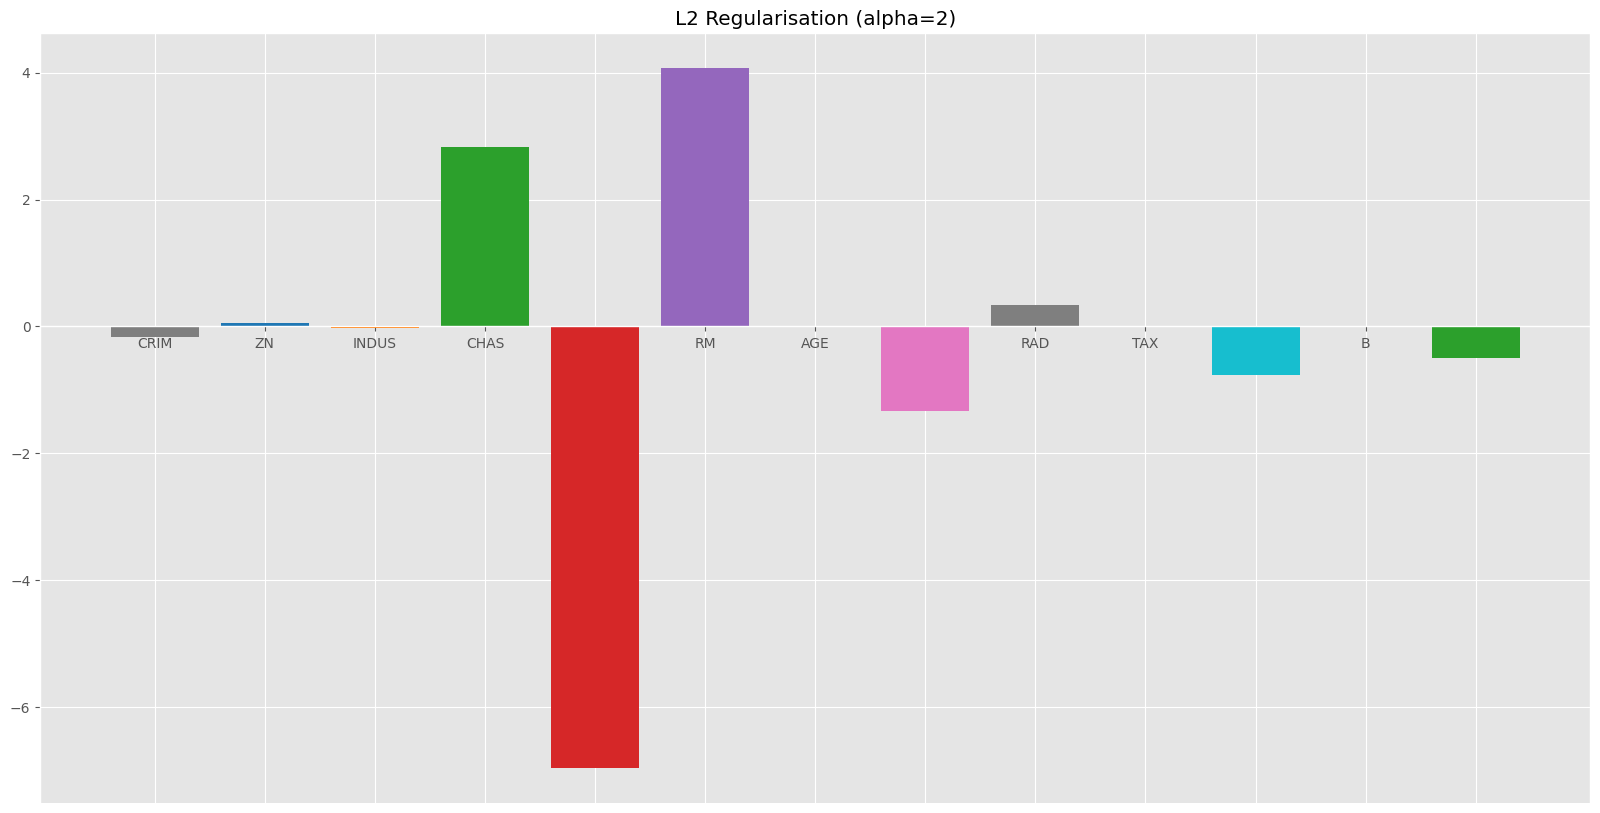

In [ ]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(ridge_coefficient["Columns"],
ridge_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.title('L2 Regularisation (alpha=2)')
plt.show()

**Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 2)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set:", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

Mean squared error on test set: 28.986744080806872
    Columns  Coefficient Estimate
0      CRIM             -0.068362
1        ZN              0.053876
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              0.000000
6       AGE              0.032274
7       DIS             -0.157019
8       RAD              0.201355
9       TAX             -0.011696
10  PTRATIO             -0.340923
11        B              0.009111
12    LSTAT             -0.796733


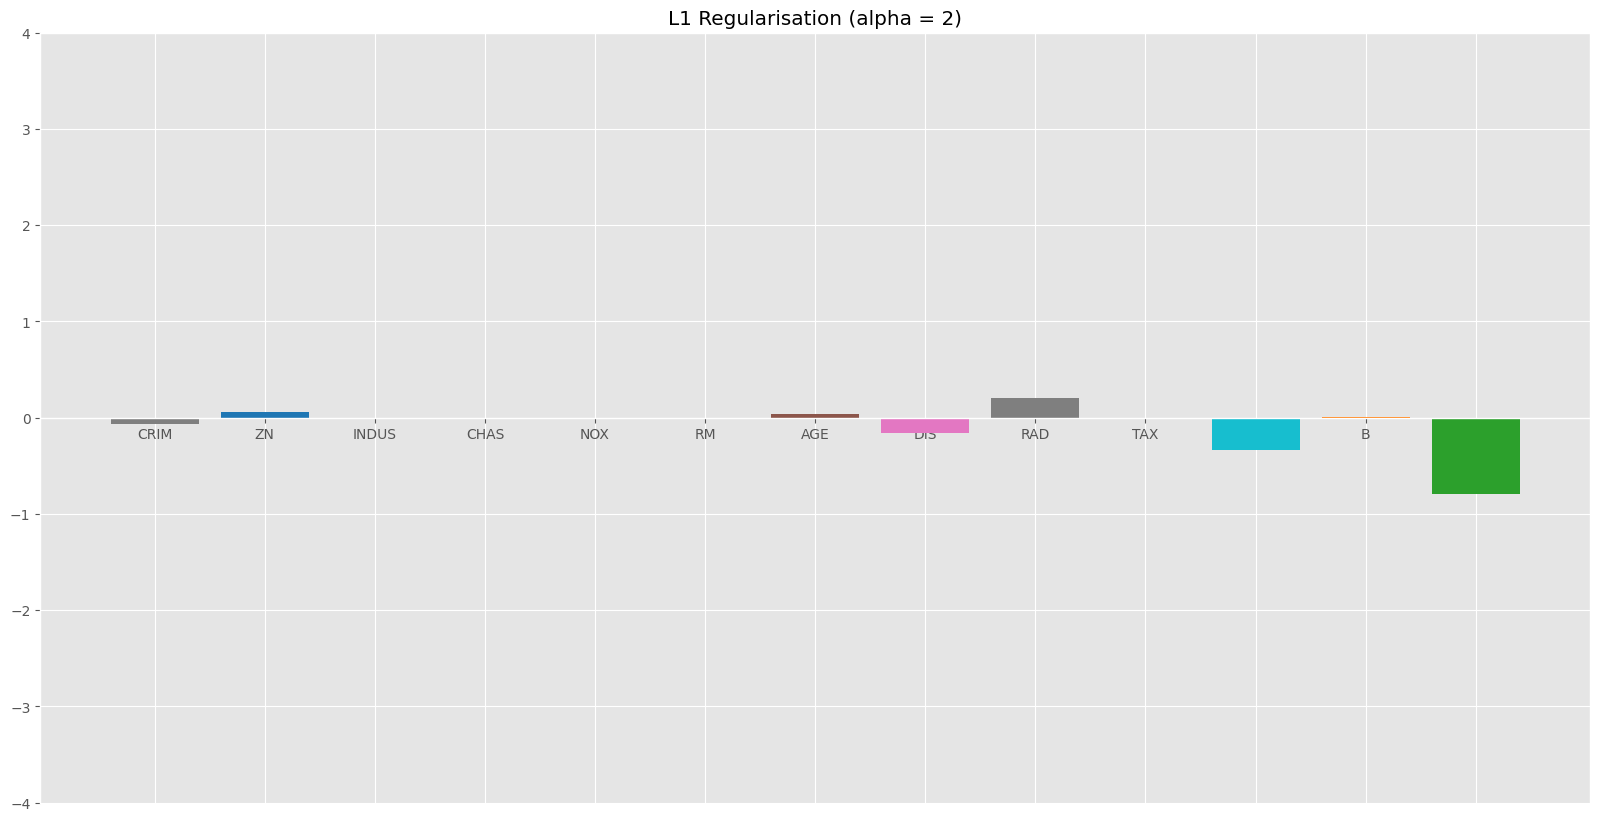

In [ ]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lasso_coeff["Columns"],
lasso_coeff['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.title('L1 Regularisation (alpha = 2)')
plt.ylim(-4,4)
plt.show()

**Elastic Net Regression**

In [ ]:
# import model
from sklearn.linear_model import ElasticNet

# Train the model
e_net = ElasticNet(alpha =2,l1_ratio=0.1)
e_net.fit(x_train, y_train)

# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(x_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set:", mean_squared_error)

e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = x_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
print(e_net_coeff)

Mean Squared Error on test set: 19.262409724679035
    Columns  Coefficient Estimate
0      CRIM             -0.067387
1        ZN              0.056245
2     INDUS             -0.041858
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              0.605472
6       AGE              0.043250
7       DIS             -0.645583
8       RAD              0.282148
9       TAX             -0.015335
10  PTRATIO             -0.645907
11        B              0.004914
12    LSTAT             -0.854930


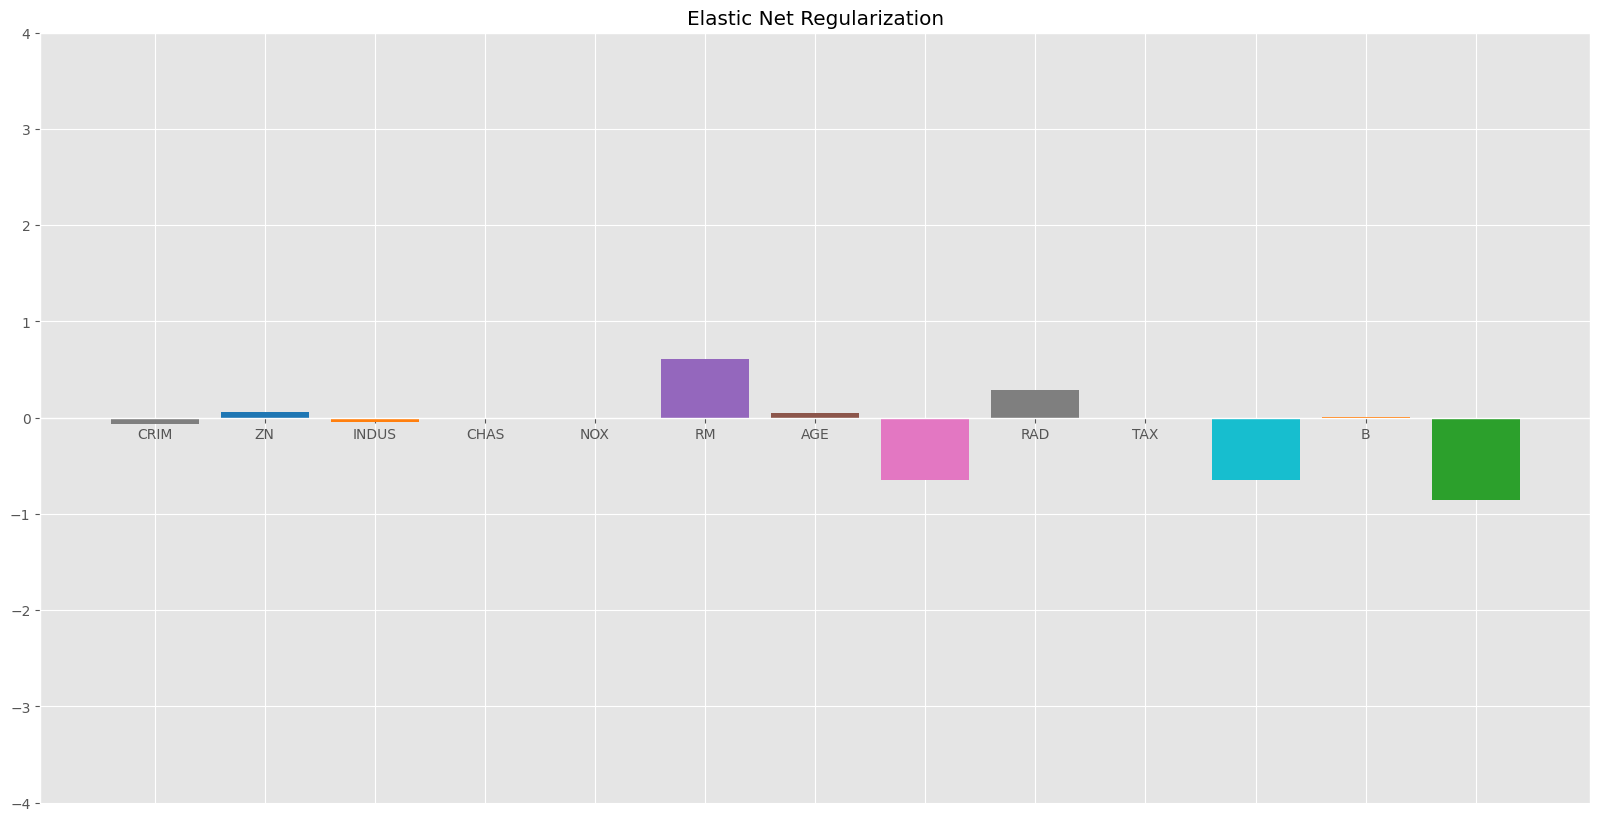

In [ ]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(e_net_coeff["Columns"],
e_net_coeff['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.title('Elastic Net Regularization')
plt.ylim(-4,4)
plt.show()